In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import constants
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd
ds = pd.read_csv('TSCR1.csv')

In [3]:
ds.head(20)

,Time,ENSMUST ID,Transcript,Length (bp),Coverage,FPKM
0,0.000,110888,204,4999,0.000,0.00
1,0.000,48371,202,4818,0.000,0.00
2,0.000,177333,215,438,0.000,0.00
3,0.000,176886,213,2278,0.000,0.00
4,0.000,176581,212,398,0.000,0.00
5,0.000,175984,211,917,0.000,0.00
6,0.000,177471,216,801,0.000,0.00
7,0.000,175811,210,650,0.000,0.00
8,0.000,175655,209,603,0.000,0.00
9,0.000,140251,207,670,0.000,0.00


In [4]:
ds.shape

(96, 6)

In [5]:
ds.columns

Index(['Time', 'ENSMUST ID', 'Transcript', 'Length (bp)', 'Coverage', 'FPKM'], dtype='object')

In [6]:
print(ds['Transcript'])

0     204
1     202
2     215
3     213
4     212
     ... 
91    203
92    214
93    201
94    206
95    205
Name: Transcript, Length: 96, dtype: int64


In [7]:
print(ds['FPKM'])

0       0.000
1       0.000
2       0.000
3       0.000
4       0.000
       ...   
91      0.000
92      0.000
93    126.806
94      0.000
95      0.000
Name: FPKM, Length: 96, dtype: float64


In [8]:
print(ds['Time'])

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
91    72.0
92    72.0
93    72.0
94    72.0
95    72.0
Name: Time, Length: 96, dtype: float64


In [9]:
print(ds[ds['Transcript'] == 201]['FPKM'].median())
print(ds[ds['Transcript'] == 201]['Coverage'].median())

157.4295
1082.846


In [10]:
groupby_TS = ds.groupby('Transcript')
for transcript, value in groupby_TS['FPKM']:
    print((transcript, value.median()))

(201, np.float64(157.4295))
(202, np.float64(0.0))
(203, np.float64(0.0))
(204, np.float64(0.0))
(205, np.float64(0.0))
(206, np.float64(0.0))
(207, np.float64(0.0))
(208, np.float64(0.0))
(209, np.float64(0.0))
(210, np.float64(0.0))
(211, np.float64(0.0))
(212, np.float64(0.0))
(213, np.float64(0.0))
(214, np.float64(0.0))
(215, np.float64(0.0))
(216, np.float64(0.0))


In [11]:
groupby_TS = ds.groupby('Transcript')
for transcript, value in groupby_TS['Coverage']:
    print((transcript, value.median()))

(201, np.float64(1082.846))
(202, np.float64(0.0))
(203, np.float64(0.0))
(204, np.float64(0.0))
(205, np.float64(0.0))
(206, np.float64(0.0))
(207, np.float64(0.0))
(208, np.float64(0.0))
(209, np.float64(0.0))
(210, np.float64(0.0))
(211, np.float64(0.0))
(212, np.float64(0.0))
(213, np.float64(0.0))
(214, np.float64(0.0))
(215, np.float64(0.0))
(216, np.float64(0.0))


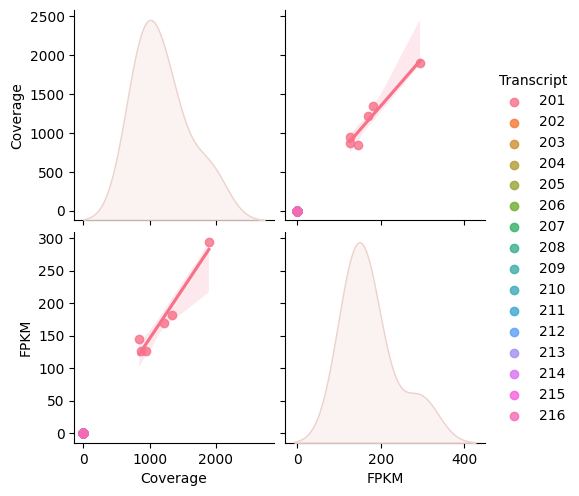

In [12]:
sns.pairplot(ds, vars=['Coverage', 'FPKM'],
                 kind='reg', hue='Transcript') 

<Axes: xlabel='FPKM', ylabel='Density'>

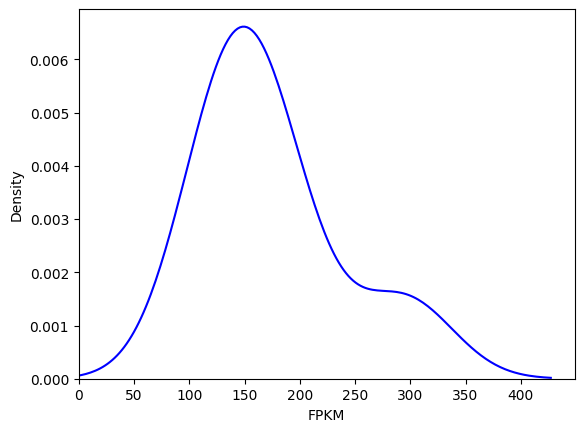

In [13]:
_201 = ds[ds['Transcript']==201]['FPKM']
pt = sns.kdeplot(_201, color = 'blue')
pt.set_xlim(xmin = 0)
pt

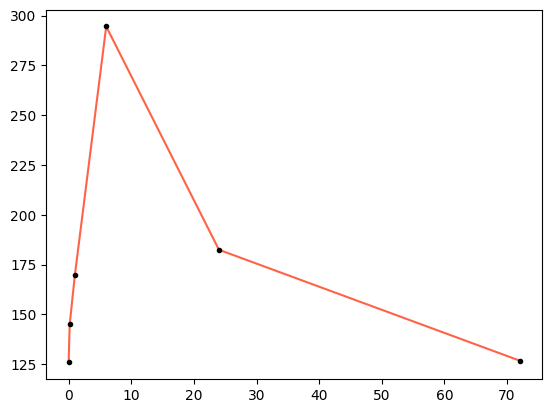

In [14]:
_201 = ds[ds['Transcript']==201]

x = _201['Time']
y = _201['FPKM']

from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
sm_x, sm_y = sm_lowess(y, x,  frac=0.2, 
                           it=5, return_sorted = True).T
plt.plot(sm_x, sm_y, color='tomato')
plt.plot(x, y, 'k.')

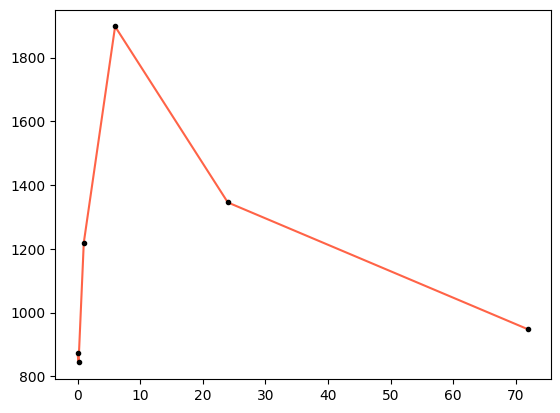

In [15]:
_201 = ds[ds['Transcript']==201]

x = _201['Time']
y = _201['Coverage']

from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
sm_x, sm_y = sm_lowess(y, x,  frac=0.2, 
                           it=5, return_sorted = True).T
plt.plot(sm_x, sm_y, color='tomato')
plt.plot(x, y, 'k.')

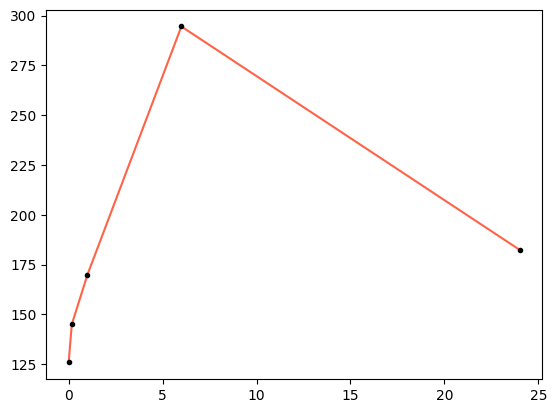

In [17]:
_201 = ds[ds['Transcript']==201]

x = _201[_201['Time'] <= 24]['Time']
y = _201[_201['Time'] <= 24]['FPKM']

from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
sm_x, sm_y = sm_lowess(y, x,  frac=0.2, 
                           it=5, return_sorted = True).T
plt.plot(sm_x, sm_y, color='tomato')
plt.plot(x, y, 'k.')

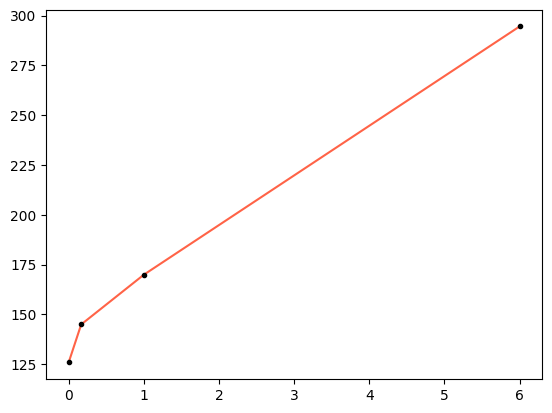

In [19]:
_201 = ds[ds['Transcript']==201]

x = _201[_201['Time'] < 24]['Time']
y = _201[_201['Time'] < 24]['FPKM']

from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
sm_x, sm_y = sm_lowess(y, x,  frac=0.2, 
                           it=5, return_sorted = True).T
plt.plot(sm_x, sm_y, color='tomato')
plt.plot(x, y, 'k.')

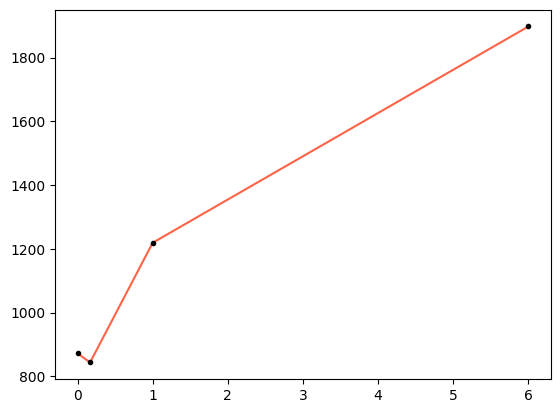

In [20]:
_201 = ds[ds['Transcript']==201]

x = _201[_201['Time'] < 24]['Time']
y = _201[_201['Time'] < 24]['Coverage']

from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
sm_x, sm_y = sm_lowess(y, x,  frac=0.2, 
                           it=5, return_sorted = True).T
plt.plot(sm_x, sm_y, color='tomato')
plt.plot(x, y, 'k.')